## Analisis DBSCAN (Density-based spatial clustering of applications with noise) Untuk Menclusterkan Kinerja Pegawai

In [ ]:
# Install package UMAP 
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 12.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a2479c50079f2fa572eb3b27e99bb5fb8444277168c3e7436abb2c19210b2ca7
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a13d123b2ecffa71489a0f4f0882c4037d36ef364a17d8c17a270ce278cda856
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Import Dataset
data = pd.read_csv('pegawaiencoder.csv')
data

,Unnamed: 0,Nama,Tempat Tanggal Lahir,Unit Kerja,Golongan Pangkat,TMT Golongan,Eselon,Nama Jabatan,TMT Jabatan,Status Pegawai,TMT Pegawai,Masa Kerja Tahun,Masa Kerja Bulan,Jenis Kelamin,Status Perkawinan,Pendidikan Awal,Pendidikan Akhir
0,0,"Ir. H. EPI KUSTIAWAN,M.P.","BANDUNG,17 March 1962",Kepana Dinas,12,01 April 2020,2,KEPALA DINAS KEHUTANAN,03 January 2019,PNS,01 October 1988,35.0,8.0,0,4,5,4
1,1,"AHMAD ADE HADEANSYAH,S.T., M.Si.","BANDUNG,01 April 1971",SEKRETARIAT,10,01 October 2017,3,SEKRETARIS,01 July 2019,PNS,01 May 1999,23.0,8.0,0,4,4,4
2,2,"RAHMAT HIDAYAT,S.S.T., M.P., M.H.","MAJALENGKA,23 June 1974","SUBBAGIAN PERENCANAAN DAN PELAPORAN, SEKRETARIAT",9,01 October 2019,5,KEPALA SUBBAGIAN PERENCANAAN DAN PELAPORAN,18 February 2021,PNS,01 April 1997,25.0,8.0,0,4,5,4
3,3,"Ir. Hj. IDA SURYANI,M.M.","JAMBI,02 September 1965","SUBBAGIAN KEUANGAN DAN ASET, SEKRETARIAT",9,01 April 2014,5,KEPALA SUBBAGIAN KEUANGAN DAN ASET,10 January 2020,PNS,01 January 1993,28.0,10.0,1,4,5,4
4,4,"RATU SITI CHODIDJAH,S.H.","SUBANG,12 September 1966","SUBBAGIAN KEPEGAWAIAN, UMUM, DAN KEHUMASAN, SE...",8,01 April 2005,5,"KEPALA SUBBAGIAN KEPEGAWAIAN, UMUM, DAN KEHUMASAN",18 February 2021,PNS,01 October 1994,28.0,10.0,1,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,657,"DEFFI SETIADI,S.Hut.","BANDUNG,01 December 1976","SUBBAGIAN PERENCANAAN DAN PELAPORAN, SEKRETARIAT",6,01 October 2018,0,PERENCANA AHLI PERTAMA,01 April 2018,PNS,01 October 2015,7.0,4.0,0,4,4,3
655,658,"LELY SITI AWALIAH,S.Hut., S.Sos. M.M.","BANDUNG,16 November 1969","SUBBAGIAN PERENCANAAN DAN PELAPORAN, SEKRETARIAT",6,01 April 2019,0,PERENCANA AHLI PERTAMA,07 August 2019,PNS,31 December 2008,14.0,10.0,1,4,6,4
656,659,"TULUS RAHAYU,S.E.","KEBUMEN,08 April 1974","SUBBAGIAN KEPEGAWAIAN, UMUM, DAN KEHUMASAN, SE...",6,01 April 2021,0,ANALIS KEPEGAWAIAN AHLI PERTAMA,01 September 2020,PNS,01 October 2009,13.0,10.0,0,4,6,3
657,660,"HERMAWAN,S. Hut., M.P.","MAJALENGKA,10 February 1979","SEKSI PERENCANAAN DAN PEMANFAATAN, UPTD TAMAN ...",8,01 August 2021,1,PENYUSUN PROMOSI DAN KERJASAMA,01 August 2021,PNS,01 March 1999,23.0,8.0,0,4,7,4


In [ ]:
# Ambil kolom/variabel yang akan dipakai untuk analisis cluster
Clus_dataSet = data[['Golongan Pangkat', 'Eselon', 'Masa Kerja Tahun', 'Masa Kerja Bulan', 'Jenis Kelamin', 'Status Perkawinan', 'Pendidikan Awal', 'Pendidikan Akhir']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
# Standarisasi nilai variabel yang sudah dipilih
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [ ]:
# Menghitung algoritma DBSCAN dengan nilai Epsilon = 1.4 dan Minimum points = 10
db = DBSCAN(eps=1.4, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data['Clus_Db']=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [ ]:
# Menampilkan data sampel variabel
print(data[['Golongan Pangkat', 'Eselon', 'Masa Kerja Tahun', 'Masa Kerja Bulan', 'Jenis Kelamin', 'Status Perkawinan', 'Pendidikan Awal', 'Pendidikan Akhir']].head())
# Nomor Label
print("Nilai Cluster: ", set(labels))
# Total Cluster
print('Total Clusters: %d' % realClusterNum)
# Evaluasi dengan Silhoute Score
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Clus_dataSet, labels))


   Golongan Pangkat  Eselon  Masa Kerja Tahun  Masa Kerja Bulan  \
0                12       2              35.0               8.0   
1                10       3              23.0               8.0   
2                 9       5              25.0               8.0   
3                 9       5              28.0              10.0   
4                 8       5              28.0              10.0   

   Jenis Kelamin  Status Perkawinan  Pendidikan Awal  Pendidikan Akhir  
0              0                  4                5                 4  
1              0                  4                4                 4  
2              0                  4                5                 4  
3              1                  4                5                 4  
4              1                  4                4                 3  
number of labels:  {0, 1, 2, 3, 4, 5, 6, -1}
Count Of clusters: 7
Silhouette Coefficient: 0.321


In [ ]:
# Identifikasi cluster berdasarkan rata-rata variabel
for clust_number in set(labels):
    clust_set = data[data.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Rata-Rata Golongan Pangkat: '+ str(round(np.mean(clust_set['Golongan Pangkat'])))+\
               ', Rata-Rata Eselon: '+ str(round(np.mean(clust_set['Eselon'])))+\
               ', Rata-Rata Masa Kerja Tahun: '+ str(round(np.mean(clust_set['Masa Kerja Tahun'])))+\
               ', Rata-Rata Masa Kerja Bulan: '+ str(round(np.mean(clust_set['Masa Kerja Bulan'])))+\
               ', Rata-Rata Jenis Kelamin: '+ str(round(np.mean(clust_set['Jenis Kelamin'])))+\
               ', Rata-Rata Status Perkawinan: '+ str(round(np.mean(clust_set['Status Perkawinan'])))+\
               ', Rata-Rata Pendidikan Awal: '+ str(round(np.mean(clust_set['Pendidikan Awal'])))+\
               ', Rata-Rata Pendidikan Akhir: '+ str(round(np.mean(clust_set['Pendidikan Akhir'])))+\
               ', Total Pegawai: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Rata-Rata Golongan Pangkat: 9, Rata-Rata Eselon: 5, Rata-Rata Masa Kerja Tahun: 26, Rata-Rata Masa Kerja Bulan: 8, Rata-Rata Jenis Kelamin: 0, Rata-Rata Status Perkawinan: 4, Rata-Rata Pendidikan Awal: 5, Rata-Rata Pendidikan Akhir: 4, Total Pegawai: 38
Cluster 1, Rata-Rata Golongan Pangkat: 8, Rata-Rata Eselon: 0, Rata-Rata Masa Kerja Tahun: 19, Rata-Rata Masa Kerja Bulan: 9, Rata-Rata Jenis Kelamin: 0, Rata-Rata Status Perkawinan: 4, Rata-Rata Pendidikan Awal: 5, Rata-Rata Pendidikan Akhir: 3, Total Pegawai: 347
Cluster 2, Rata-Rata Golongan Pangkat: 8, Rata-Rata Eselon: 0, Rata-Rata Masa Kerja Tahun: 16, Rata-Rata Masa Kerja Bulan: 9, Rata-Rata Jenis Kelamin: 1, Rata-Rata Status Perkawinan: 4, Rata-Rata Pendidikan Awal: 5, Rata-Rata Pendidikan Akhir: 3, Total Pegawai: 66
Cluster 3, Rata-Rata Golongan Pangkat: 7, Rata-Rata Eselon: 0, Rata-Rata Masa Kerja Tahun: 26, Rata-Rata Masa Kerja Bulan: 8, Rata-Rata Jenis Kelamin: 0, Rata-Rata Status Perkawinan: 4, Rata-Rata Pendidik

In [ ]:
# Membuat scatter flot clustering
from umap import UMAP
umap = UMAP(random_state=42)
embedding = umap.fit_transform(Clus_dataSet)

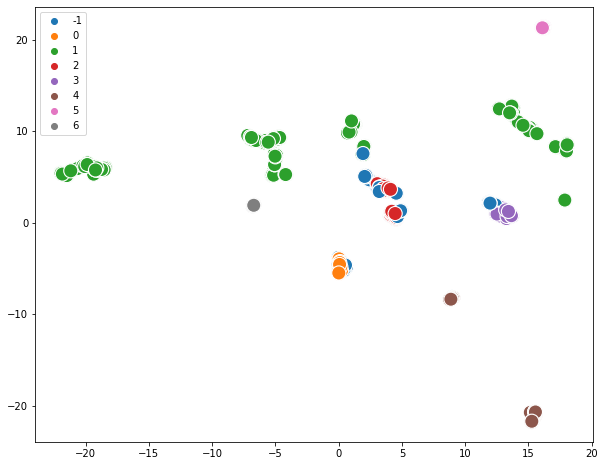

In [ ]:
# Hasil Clustering dengan scatter UMAP
plt.figure(figsize=(10,8))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=db.labels_,s=200, palette="tab10")
plt.show()

#### Kesimpulan
- Dataset yang digunakan adalah data pegawai
- Analisis menggunakan metode cluster DBSCAN
- Parameter DBSCAN dengan epsilon = 1.4 dan Minumum Points = 10
- Dari opsi parameter tersebut mendapatkan hasil cluster berjumlah 7.
- Kinerja pegawai terbaik ada pada cluster 0 dengan :
  - Rata-Rata Rata-Rata Golongan Pangkat: 9
  - Rata-Rata Eselon: 5
  - Rata-Rata Masa Kerja Tahun: 26 
  - Rata-Rata Masa Kerja Bulan: 8
  - Rata-Rata Jenis Kelamin: 0 
  - Rata-Rata Status Perkawinan: 4 
  - Rata-Rata Pendidikan Awal: 5 
  - Rata-Rata Pendidikan Akhir: 4 
  - Total Pegawai: 38
- Dari Hasil cluster tersebut mempunyai nilai Silhoutte = 0.321